<a href="https://colab.research.google.com/github/emanueleusai/CS4RI/blob/master/CODER/Albedo/sklearn_Albedo_Py.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exploring the Moon with Machine Learning

<img width="75%" src="https://github.com/emanueleusai/CS4RI/blob/master/CODER/img/Lunar_Albedo_Header.png?raw=1"> </img>


# Chemical Composition Map

<img width="75%" src="https://github.com/emanueleusai/CS4RI/blob/master/CODER/img/Lunar_Composition_Maps.png?raw=1"> </img>

### The chemical composition of lunar rocks determines how light or dark the surface is. Note the relationship between high iron (Fe) and dark regions on the Moon in the above maps. 

### Machine learning can discover the relationship between the visible appearance of the Moon (its albedo) and its chemical composition. 

### Once that relationship is known, the albedo map can be predicted from chemical maps.

# Load data

In [1]:
!git clone https://github.com/emanueleusai/CS4RI.git
!cp -r CS4RI/CODER/Albedo/data .
!rm -r CS4RI

Cloning into 'CS4RI'...
remote: Enumerating objects: 182, done.
remote: Total 182 (delta 0), reused 0 (delta 0), pack-reused 182
Receiving objects: 100% (182/182), 50.51 MiB | 27.87 MiB/s, done.
Resolving deltas: 100% (88/88), done.


# Activate Libraries Needed For This Analysis

In [2]:
# import ROOT
# from ROOT import TMVA,TFile, TTree, TCut, TString, TCanvas,  TASImage
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

# Plotting the data
The data include the Lunar albedo map (visible appearance of the Moon) and maps of chemical composition as measured by Lunar Prospector. 

Maps are:

Lunar iron (Fe) = LPFe_Map.csv

Lunar titanium (Ti) = LPFe_Map.csv

Lunar potassium (K) = LPK_Map.csv

Lunar thorium (Th) = LPTh_Map.csv

Lunar iron (Fe) = LPFe_Map.csv

Lunar fast neutrons (fast) = Fast_Map.csv

Lunar thermal neutrons (therm) = Therm_Map.csv


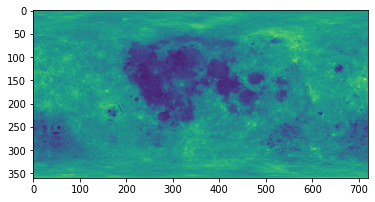

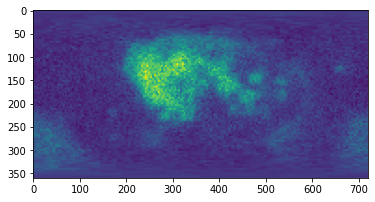

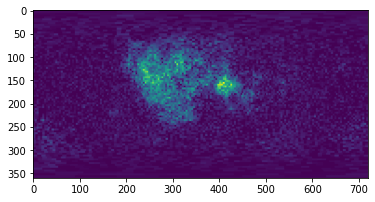

In [3]:
img=np.genfromtxt('data/Updated Maps/Albedo_Map.csv',delimiter=',')
imgplot = plt.imshow(img)
plt.show()

img=np.genfromtxt('data/Updated Maps/LPFe_Map.csv',delimiter=',')
imgplot = plt.imshow(img)
plt.show()

img=np.genfromtxt('data/Updated Maps/LPTi_Map.csv',delimiter=',')
imgplot = plt.imshow(img)
plt.show()

### Earlier we showed that Fe is a major factor for brightness (albedo). Higher iron = darker color.

### However note that other elements are also important, such as titanium shown above. 

### Exercise: Use the code above to plot other chemical maps and look for visual relationships between chemical composition and albedo. Which elements are important?


# Machine Learning

## Machine Learning is a science that studies algorithms capable of learning from data.

<img width="25%" src="https://github.com/emanueleusai/CS4RI/blob/master/CODER/img/ML_Robot.png?raw=1"> </img>

### Can Machine Learning identify relationships between lunar chemistry and lunar albedo? If so, can it teach us anything new about the Moon?

# Data Preparation

Read in chemical maps, stored in dataset.root file


In [4]:
maps=['Fast','LPFe','LPK','LPTh','LPTi','Therm','Albedo']

images={}

for element in maps:
  images[element] = p.read_csv('data/Updated Maps/'+element+'_Map.csv',header=None)

## Declare Variables
Define input variables, which are the chemical maps, and the target to be learned - the albedo map.

In [5]:
left_side_data = {}
right_side_data = {}
both_sides_data = {}

for element in maps:
  left_side_data[element] = images[element].drop(
      images[element].columns[:360], axis = 1).to_numpy().flatten()
  right_side_data[element] = images[element].drop(
      images[element].columns[360:], axis = 1).to_numpy().flatten()
  both_sides_data[element] = images[element].to_numpy().flatten()

left_side_data = p.DataFrame(left_side_data)
right_side_data = p.DataFrame(right_side_data)
both_sides_data = p.DataFrame(both_sides_data)
albedo_left = np.array(left_side_data.pop("Albedo"))
albedo_right = np.array(right_side_data.pop("Albedo"))
albedo_both_sides = np.array(both_sides_data.pop("Albedo"));

## Choose the features
Which elements are we going to use?

In [6]:
features=['Fast','LPFe','LPK','LPTh','LPTi','Therm']

# Machine Learning Methods and Applications

## There are two main types of machine learning applications: classification and regression.

## Classification is when the program learns to predict a class or a type of an object (for example, does a picture contain a cat or dog)

<img width="40%" src="https://github.com/emanueleusai/CS4RI/blob/master/CODER/img/Cat_or_Dog.jpg?raw=1"> </img>


## Regression is when the program  learns to predict an unknown property of an object, for example the weight of the cat in the picture

<img width="25%" src="https://github.com/emanueleusai/CS4RI/blob/master/CODER/img/Cat_on_Scale.jpg?raw=1"> </img>

## This example uses a machine learning algorithm called a boosted decision tree (BDT). Boosted decision trees can be used for both classification and regression. 

<img width="35%" src="https://github.com/emanueleusai/CS4RI/blob/master/CODER/img/Decision_Tree.jpg?raw=1"> </img>


In [7]:
# Boosted Decision Trees 
reg = GradientBoostingRegressor(random_state=0,n_estimators=300,max_depth=6)

## All machine learning algorithms require training. We will train a boosted decision tree on one half of the Moon (the training dataset).

## We will then apply the trained algorithm to the other half. The algorithm will use the chemical maps to predict the albedo of the other half of the Moon.

# Train Method

In [8]:
reg.fit(y=albedo_left, X=left_side_data[features])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Test and Evaluate

In [9]:
prediction_right=reg.predict(right_side_data[features]).reshape(-1, 360)
prediction_both_sides=reg.predict(both_sides_data[features]).reshape(-1, 720)    

## Plot the training (left half) of the Moon

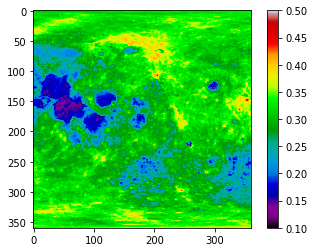

In [10]:
imgplot = plt.imshow(albedo_left.reshape(-1, 360))
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## Plot the predicted (right) half of the Moon

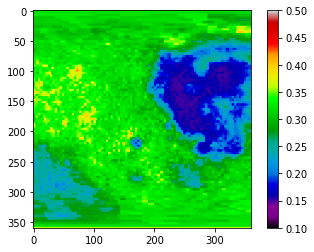

In [11]:
imgplot = plt.imshow(prediction_right)
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## Plot the actual (right) half of the Moon¶

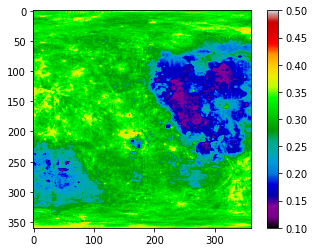

In [12]:
imgplot = plt.imshow(albedo_right.reshape(-1, 360))
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## Now plot the whole predicted Moon 

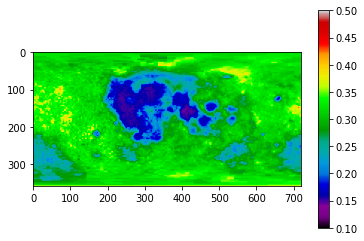

In [13]:
imgplot = plt.imshow(prediction_both_sides)
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## Now plot the whole actual Moon

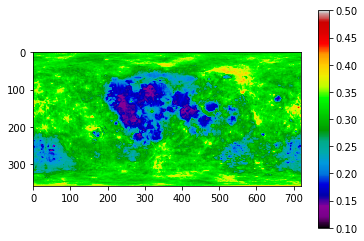

In [14]:
imgplot = plt.imshow(albedo_both_sides.reshape(-1, 720))
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## How well did the algorithm do in predicting the albedo map of the right side of the Moon?

## Can you spot any differences? What could those difference indicate?